# Importing all required libraries

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


# Data Preprocessing and handling

In [11]:
# Loading the dataset
data = pd.read_csv('stroke-data.csv')

# Dataset information
print(data.info())

print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Filling missing values in 'bmi' column with the mean
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

# Encoding categorical variables
label_encoders = {}
for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Splitting the data into features (X) and target (y)
X = data.drop(['id', 'stroke'], axis=1)
y = data['stroke']

# Addressing class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354   

# Baseline Model: Logistic Regression

Accuracy of Logistic Regression Model: 80.67%

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       975
           1       0.79      0.83      0.81       970

    accuracy                           0.81      1945
   macro avg       0.81      0.81      0.81      1945
weighted avg       0.81      0.81      0.81      1945



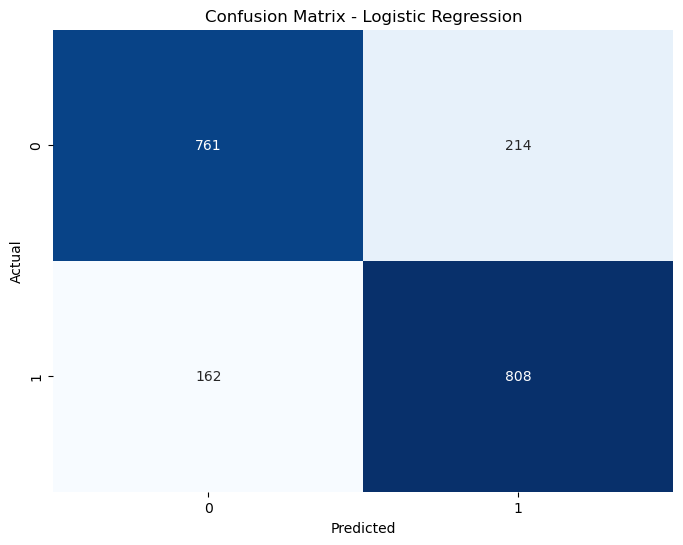

In [14]:
# Training Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predicting using Logistic Regression
log_pred = log_reg.predict(X_test)

# Calculating and displaying accuracy
log_accuracy = accuracy_score(y_test, log_pred)
print(f"Accuracy of Logistic Regression Model: {log_accuracy * 100:.2f}%")

# Evaluating Logistic Regression
print("\nLogistic Regression Performance:")
print(classification_report(y_test, log_pred))

# Computing Confusion Matrix
log_conf_matrix = confusion_matrix(y_test, log_pred)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(log_conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Prototype Model (Random Forest)

Accuracy of Random Forest Model: 94.91%

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       975
           1       0.94      0.96      0.95       970

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



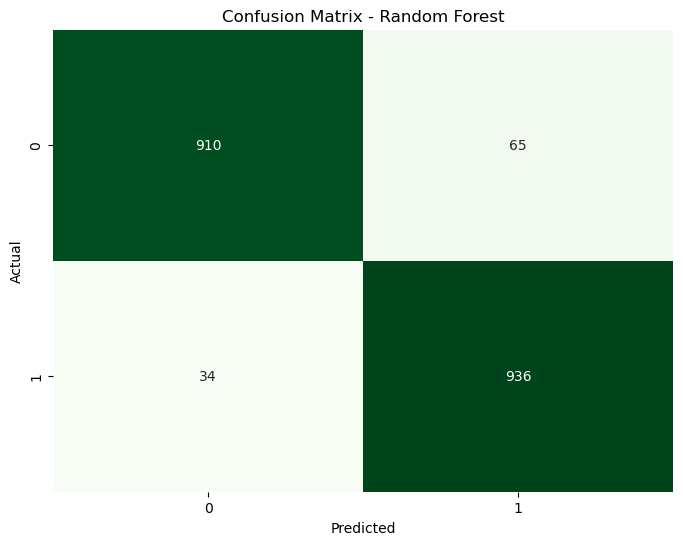

In [17]:
# Training Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting using Random Forest
rf_pred = rf_model.predict(X_test)

# Calculating and displaying accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy of Random Forest Model: {rf_accuracy * 100:.2f}%")

# Evaluating Random Forest
print("\nRandom Forest Performance:")
print(classification_report(y_test, rf_pred))

# Computing Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap='Greens', cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ROC Curve and Precision-Recall Curve for Random Forest

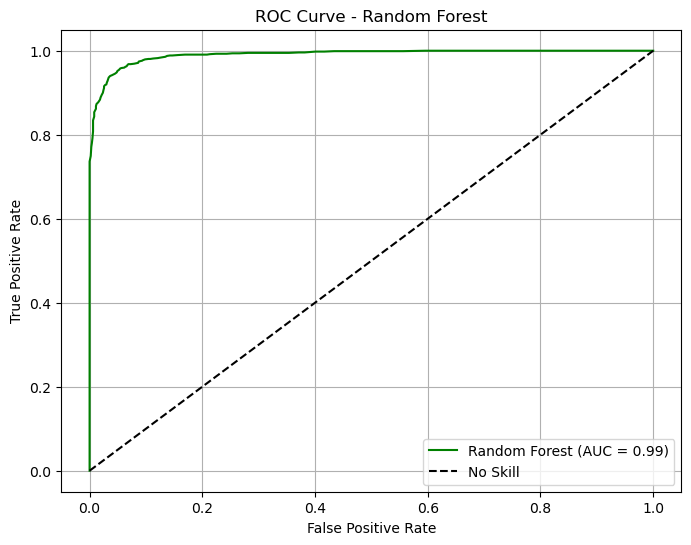

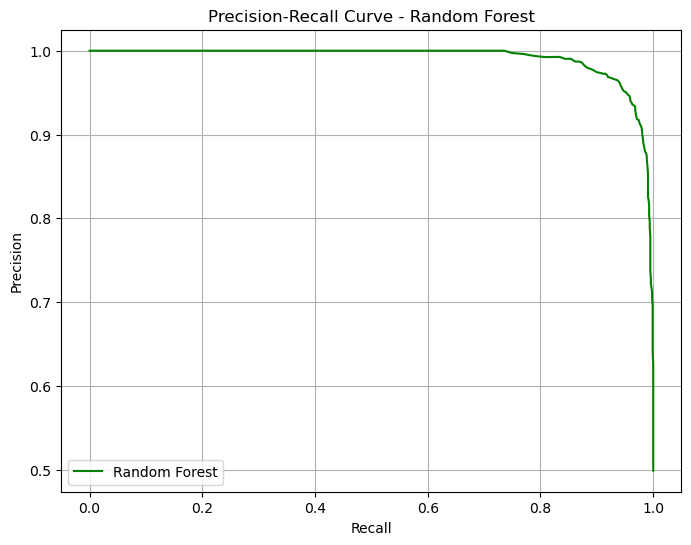

In [20]:
# Generating probabilities for Random Forest
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
auc_rf = roc_auc_score(y_test, rf_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid()
plt.show()

# Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label='Random Forest', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend()
plt.grid()
plt.show()


# Model Comparison

Model Comparison:
Baseline Model (Logistic Regression) Accuracy: 80.67%
AI Prototype Model (Random Forest) Accuracy: 94.91%


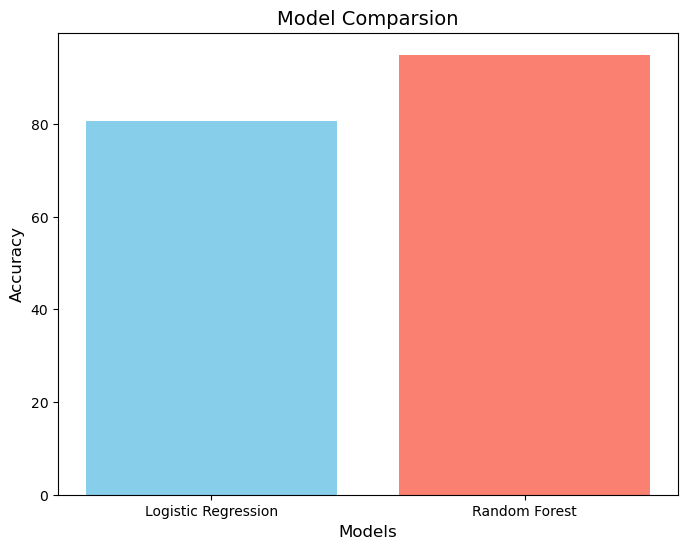

In [23]:
# Comparing Model Accuracies

print("Model Comparison:")
print(f"Baseline Model (Logistic Regression) Accuracy: {log_accuracy * 100:.2f}%")
print(f"AI Prototype Model (Random Forest) Accuracy: {rf_accuracy * 100:.2f}%")

models = ['Logistic Regression', 'Random Forest']
accuracies = [log_accuracy * 100, rf_accuracy * 100] 

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'salmon'])

plt.title('Model Comparsion', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.show()
